##**TABULAR PLAYGROUND SERIES - APRIL 2021 - SYNTHANIC DATASET**


###**1.Abstract** <br>
I am predicting which passengers have survived the Titanic shipwreck by building machine learning model that is optimized by hyperparameter tuning and feature engineering as well as intepreting the model

###**2.Importing Libraries** <br>

In [1]:
import pandas as pd #For Data Analysis and Manipulation
import matplotlib.pyplot as plt # A plotting framework
import seaborn as sns #For Data Visualization
import numpy as np

### **3. Loading Data**

In [2]:
data = pd.read_csv('https://github.com/kashyap-datta/TitanicPlaygroundCompetition/blob/main/train.csv?raw=true', sep=',') #Reading CSV file into a dataframe from github
data.head()
data1 = data.copy(deep=True)

### **4. Understanding Data**

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>
<br>
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [32]:
data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [33]:
!pip install pandas-profiling==2.7.1
import pandas_profiling as pp
pp.ProfileReport(data) #to display the report

     |████████████████████████████████| 252 kB 4.9 MB/s 
     |████████████████████████████████| 4.7 MB 43.3 MB/s 
     |████████████████████████████████| 675 kB 43.5 MB/s 
     |████████████████████████████████| 58 kB 4.8 MB/s 
     |████████████████████████████████| 812 kB 42.3 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b65c813d144931230b8a47d9ba9d73bcba57e3f80f586be7706f7eb7771ef8ab
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=bd74be7c18106a68d6608b4e066557fca9e32c5efc649f767b74c314a63cfed9
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

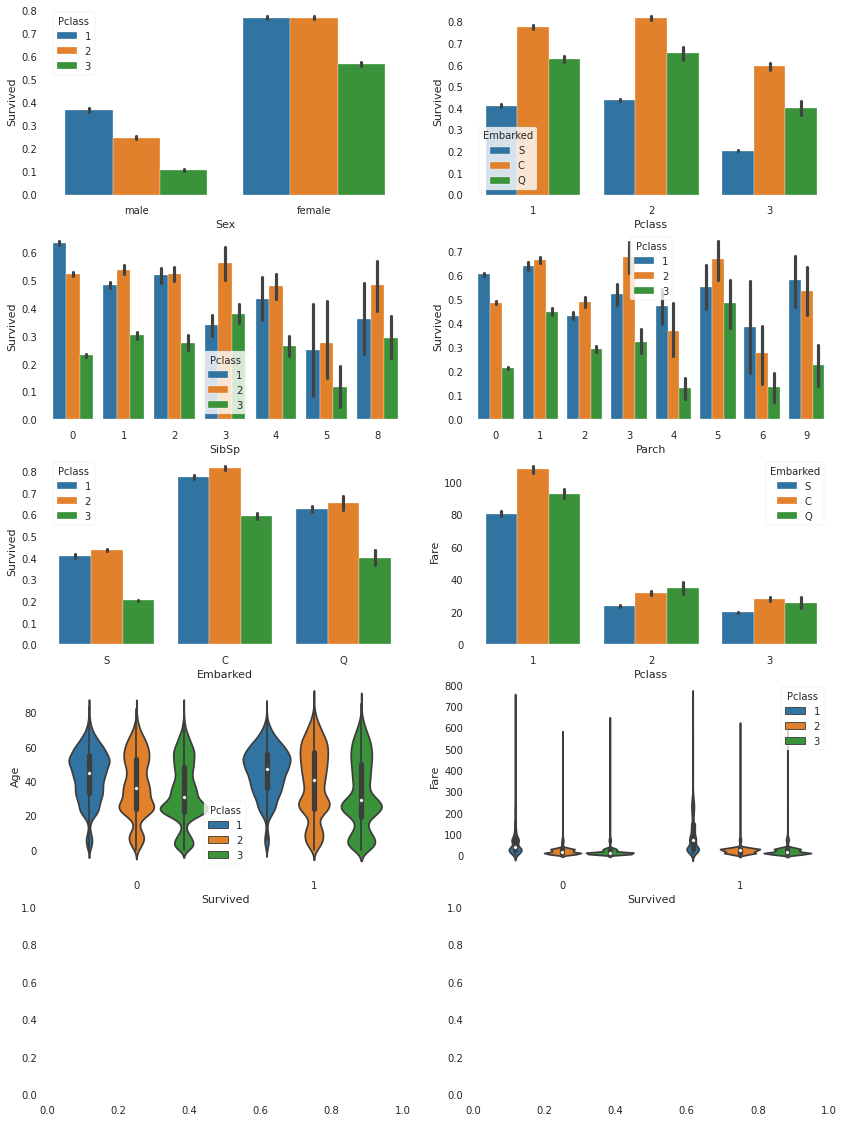

In [40]:
fig, ax = plt.subplots(5,2,figsize=(14,20))
sns.barplot(data=data, x="Sex", y="Survived",ax=ax[0][0], hue="Pclass")
sns.barplot(data=data, x="Pclass", y="Survived",ax=ax[0][1],hue="Embarked")
sns.barplot(data=data, x="SibSp", y="Survived",ax=ax[1][0],hue="Pclass")
sns.barplot(data=data, x="Parch", y="Survived",ax=ax[1][1],hue="Pclass")
sns.barplot(data=data, x="Embarked", y="Survived",ax=ax[2][0],hue="Pclass")
sns.barplot(data=data, x="Pclass", y="Fare",ax=ax[2][1],hue="Embarked")
sns.violinplot(data=data, x="Survived", y="Age",ax=ax[3][0],hue="Pclass")
sns.violinplot(data=data, x="Survived", y="Fare",ax=ax[3][1],hue="Pclass")

From the above we can observe that - <br>
Females from Pclass 1 and 2 have the highest chance of surviving.<br>
Passangers emabarking at Cherbourg with Pclass 2 has the highest survival rate.<br>
Pclass 1 passangers paid high fares
Most people survived from Pclass 1 have ages around 50-60. 



### **4. Data Preprocessing and Model Selection**

Imputing the Missing Values in Embarked, Age and Fare and dropping some columns, as they have high cardinality and hence don't seem very usefull to predict the outcome 

I have filled missing values in the Age column by mean grouped by Pclass, Sex and Embarked as the Age distribution is almost normal. 

I have filled missing values in the Fare column by meadian grouped by Pclass, Sex and Embarked as the Fare distribution has lot of outliers and mean is sensitive to outliers. 

In [3]:
data1.Embarked.fillna(data1.Embarked.mode()[0], inplace=True) #Filling null values in Embarked with most popular value
data1['Age']=data1.groupby(['Pclass','Sex','Embarked'])['Age'].apply(lambda x:x.fillna(x.mean())) #Grouping and imputing the mean value
data1['Fare']=data1.groupby(['Pclass','Sex','Embarked'])['Fare'].apply(lambda x:x.fillna(x.median())) #Grouping and imputing the median value
data1.drop(columns=['PassengerId','Cabin','Ticket','Name'],inplace=True) #Dropping columns
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,male,41.054988,2,0,27.14,S
1,0,3,male,34.106621,0,0,13.35,S
2,0,3,male,0.330000,1,2,71.29,S
3,0,3,male,19.000000,0,0,13.04,S
4,1,3,male,25.000000,0,0,7.76,S


In [4]:
data_enc = pd.concat([data1, pd.get_dummies(data1.Sex), pd.get_dummies(data1.Embarked),],axis=1) #Creating dummies and concatenating them to the dataframe
data_enc.drop(columns=['Sex','Embarked'],inplace=True)
variables = data_enc.drop(columns=['Survived'])
target = data_enc.Survived

Checking the accuracies of  different models by fitting the above data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( variables, target, test_size = 0.3, random_state = 100) #Splitting the data into train and test with 70% train data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5) #Instanstiating the Decision Tree Classifier
clf_gini.fit(X_train, y_train) #Fitting the model
y_pred = clf_gini.predict(X_test)
print ("Decision Tree Accuracy is ", accuracy_score(y_test,y_pred)*100)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) #Instanstiating the Random Forest
clf.fit(X_train,y_train)
predict = clf.predict(X_test)
print ("Random Forest Accuracy is ", accuracy_score(y_test,predict)*100)
from sklearn import svm
clf_svm = svm.SVC() #Instanstiating the Support Vector classifier
clf_svm.fit(X_train,y_train)
predict_svm = clf_svm.predict(X_test)
print ("SVM Accuracy is ", accuracy_score(y_test,predict_svm)*100)

Decision Tree Accuracy is  76.54666666666667
Random Forest Accuracy is  72.66333333333334
SVM Accuracy is  75.97333333333334


Now, I have taken a different approach to preprocessing. This time I have replaced cabin numbers with its first letters to extract the type of cabin. I have also binned Age and Fare. Further I have created a new label called family which is the sum of SibSP and Parch.

In [6]:
data2 = data.copy(deep=True) #Creating a deep copy of data
data2.drop(columns=['Name','PassengerId','Ticket'], inplace=True) #Dropping high cardinality columns
data2.Embarked.fillna(data2.Embarked.mode()[0], inplace=True) #Filling null values in Embarked with most popular value
data2['Age']=data2.groupby(['Pclass','Sex','Embarked'])['Age'].apply(lambda x:x.fillna(x.mean())) #Grouping and imputing the mean value
data2['Fare']=data2.groupby(['Pclass','Sex','Embarked'])['Fare'].apply(lambda x:x.fillna(x.median())) #Grouping and imputing the median value
bins = [0, 2, 12, 17, 60, np.inf] 
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(data2.Age, bins, labels = labels) # Binning the age into different groups
data2['AgeGroup'] = age_groups #Created a new column called AgeGroup
data2['Cabin'] = data2['Cabin'].fillna("None") 
data2['CabinType'] = data2['Cabin'].str[0] + '_cabin' #Created new column called CabinType by extracting just the first letter from the cabin numbers
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinType
0,1,1,male,41.054988,2,0,27.14,C12239,S,adult,C_cabin
1,0,3,male,34.106621,0,0,13.35,None,S,adult,N_cabin
2,0,3,male,0.330000,1,2,71.29,None,S,baby,N_cabin
3,0,3,male,19.000000,0,0,13.04,None,S,adult,N_cabin
4,1,3,male,25.000000,0,0,7.76,None,S,adult,N_cabin


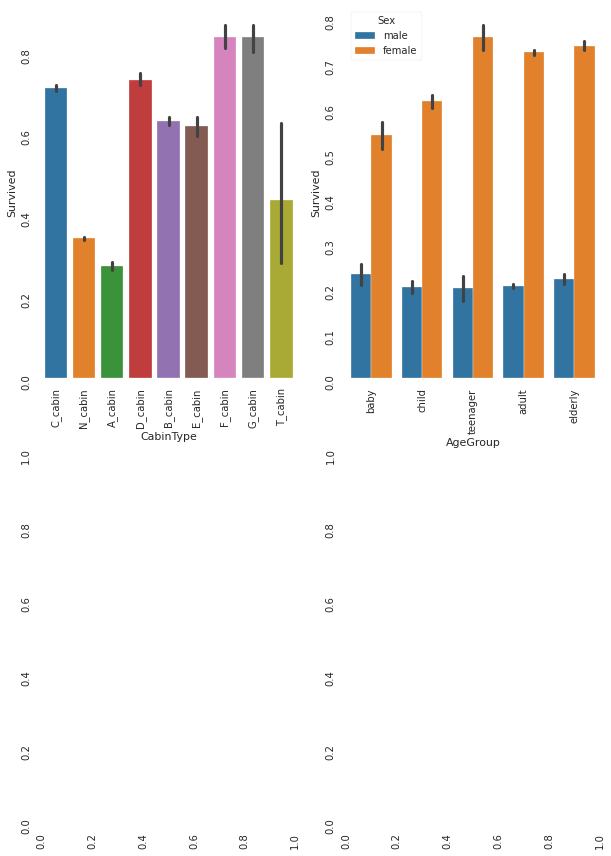

In [60]:
data2.CabinType.value_counts()
fig, ax = plt.subplots(2,2,figsize=(10,15))
sns.barplot(data=data2, x="CabinType", y="Survived",ax=ax[0][0])
sns.barplot(data=data2, x="AgeGroup", y="Survived",ax=ax[0][1],hue='Sex')
for ax in fig.axes:
  ax.tick_params(labelrotation=90)

From above we can observe that teenaged and elderly females have high rate of suvival while teenaged and adult boys have the least chance of survival<br>
F and G Cabins have the high probability to survive.

Then I encoded the binned columns - Fare and Age. Also created dummies for categorical variables- Sex,Embarked,CabinType and AgeGroup.

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#data2['Fare'] = data2['Fare'].astype('str')
data2['Fare'] = data2['Fare'].astype('float64')
data2['FareBins'] = pd.qcut(data2['Fare'], 5)
label = LabelEncoder()
data2['FareBins'] = label.fit_transform(data2['FareBins']) #Encoding FareBins
#data2['AgeGroup'] = label.fit_transform(data2['AgeGroup'])
data2['Family'] = data_enc['SibSp'] + data_enc['Parch']  #Created new column by adding tow other columns
data_enc2 = pd.concat([data2, pd.get_dummies(data2.Sex), pd.get_dummies(data2.Embarked),pd.get_dummies(data2.CabinType),pd.get_dummies(data2.AgeGroup)],axis=1) #Creating dummies and concatenating them to the dataframe
data_enc2.drop(columns=['Cabin','Age','SibSp','Parch','Fare','Sex','Embarked','CabinType','AgeGroup'],inplace=True)
print(data_enc2.head())
#variables2 = data_enc2.drop(columns=['Survived'])
#target2 = data_enc2.Survived


   Survived  Pclass  FareBins  Family  ...  child  teenager  adult  elderly
0         1       1         2       2  ...      0         0      1        0
1         0       3         1       0  ...      0         0      1        0
2         0       3         4       3  ...      0         0      0        0
3         0       3         1       0  ...      0         0      1        0
4         1       3         0       0  ...      0         0      1        0

[5 rows x 23 columns]


In [15]:
data_enc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   Survived  100000 non-null  int64
 1   Pclass    100000 non-null  int64
 2   FareBins  100000 non-null  int64
 3   Family    100000 non-null  int64
 4   female    100000 non-null  uint8
 5   male      100000 non-null  uint8
 6   C         100000 non-null  uint8
 7   Q         100000 non-null  uint8
 8   S         100000 non-null  uint8
 9   A_cabin   100000 non-null  uint8
 10  B_cabin   100000 non-null  uint8
 11  C_cabin   100000 non-null  uint8
 12  D_cabin   100000 non-null  uint8
 13  E_cabin   100000 non-null  uint8
 14  F_cabin   100000 non-null  uint8
 15  G_cabin   100000 non-null  uint8
 16  N_cabin   100000 non-null  uint8
 17  T_cabin   100000 non-null  uint8
 18  baby      100000 non-null  uint8
 19  child     100000 non-null  uint8
 20  teenager  100000 non-null  uint8
 21  adult     1

In [17]:
variables2 = data_enc2.drop(columns=['Survived'])
target2 = data_enc2.Survived

Again, I am checking the accuracies of different models using the newly feature engineered data. Here I split training data into random train (0%7) and test subsets (30%). The test subset will be used to evaluate how the classifier can generalize with unseen data. This time, we can see that accuracy has been increased

In [18]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split( variables2, target2, test_size = 0.3, random_state = 100)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train2, y_train2)
y_pred = clf_gini.predict(X_test2)
print ("Decision Tree Accuracy is ", accuracy_score(y_test2,y_pred)*100)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train2,y_train2)
predict = clf.predict(X_test2)
print ("Random Forest Accuracy is ", accuracy_score(y_test2,predict)*100)
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train2,y_train2)
predict_svm = clf_svm.predict(X_test2)
print ("SVM Accuracy is ", accuracy_score(y_test2,predict_svm)*100)

Decision Tree Accuracy is  76.55666666666666
Random Forest Accuracy is  77.08666666666667
SVM Accuracy is  77.55666666666666


### **5. Feature Selection**

I have used Recursive feature elimination with cross-validation to select the top features. The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. I have used RFC as the estimator as it has a high accuracy among the models above.


In [19]:
from sklearn.feature_selection import RFECV
from sklearn import model_selection
print("Features used during training: ")
print(variables2.columns)
print("")
cv = model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1) #dataset is divided into 6 splits. 5th split is used for training and the remaining split is used for testing
featselect = RFECV(estimator=clf, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1) #n_jobs=-1 means using all processors while fitting across folds
featselect.fit(X_train2,y_train2)
training_features = np.array(variables2.columns)
print("Features proposed by RFECV: "),
print(training_features[featselect.support_])

Features used during training: 
Index(['Pclass', 'FareBins', 'Family', 'female', 'male', 'C', 'Q', 'S',
       'A_cabin', 'B_cabin', 'C_cabin', 'D_cabin', 'E_cabin', 'F_cabin',
       'G_cabin', 'N_cabin', 'T_cabin', 'baby', 'child', 'teenager', 'adult',
       'elderly'],
      dtype='object')

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Features proposed by RFECV: 
['Pclass' 'FareBins' 'Family' 'female' 'male' 'C' 'S' 'A_cabin' 'C_cabin'
 'N_cabin']


In [20]:
training_features = np.array(variables2.columns)
print(training_features[featselect.support_])

['Pclass' 'FareBins' 'Family' 'female' 'male' 'C' 'S' 'A_cabin' 'C_cabin'
 'N_cabin']


In [21]:
features_final = training_features[featselect.support_]

## **6. Hyperparameter Tuning**
I have used RandomizedSearchCV for hyperparameter tuning. RandomizedSearchCV is useful when we have many features to try and the training time is very long. In RandomizedSearchCV the model selects the combinations randomly unlike in GridSearchCV. The performance may be slightly worse though.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
param_rand = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']} 
rs = RandomizedSearchCV(svm.SVC(), param_distributions = param_rand,n_iter=5, n_jobs = -1, random_state = 1, scoring = 'accuracy') 
rs.fit(X_train2[features_final], y_train2)
print('Test Accuracy: %0.3f' % rs.score(X_test2[features_final], y_test2))
print()
print(rs.best_params_)
print(rs.best_score_)

Test Accuracy: 0.775

{'kernel': 'rbf', 'gamma': 1, 'C': 100}
0.7732


In [23]:
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }

# Run randomized search
random_search = RandomizedSearchCV(estimator=clf, 
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   n_jobs=-1)

random_search.fit(X_train2[features_final], y_train)

print('Test Accuracy: %0.3f' % random_search.score(X_test2[features_final], y_test2))
print()
print(random_search.best_params_)
print(random_search.best_score_)


Test Accuracy: 0.775

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 1000}
0.7726285714285714


I have applied RandomSearchCV on SupportVectorClassifier and RandomForestClassifier. And both hyperameters have almost same accuracy in predicting the survival.

In [24]:
testdata = pd.read_csv('https://github.com/kashyap-datta/TitanicPlaygroundCompetition/blob/main/test.csv?raw=true', sep=',') #Reading CSV file into a dataframe from github

submission = pd.DataFrame()
submission['PassengerId'] = testdata['PassengerId']

testdata.drop(columns=['Name','PassengerId','Ticket'], inplace=True)
testdata.Embarked.fillna(testdata.Embarked.mode()[0], inplace=True)
testdata['Age']=testdata.groupby(['Pclass','Sex','Embarked'])['Age'].apply(lambda x:x.fillna(x.mean()))
testdata['Fare']=testdata.groupby(['Pclass','Sex','Embarked'])['Fare'].apply(lambda x:x.fillna(x.median()))
bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(testdata.Age, bins, labels = labels)
testdata['AgeGroup'] = age_groups
testdata['Cabin'] = testdata['Cabin'].fillna("None")
testdata['CabinType'] = testdata['Cabin'].str[0] + '_cabin'
testdata['Fare'] = testdata['Fare'].astype('float64')
testdata['FareBins'] = pd.qcut(testdata['Fare'], 5)
label = LabelEncoder()
testdata['FareBins'] = label.fit_transform(testdata['FareBins'])
#testdata['AgeGroup'] = label.fit_transform(testdata['AgeGroup'])
testdata['Family'] = data_enc['SibSp'] + data_enc['Parch']
testdata_enc = pd.concat([testdata, pd.get_dummies(testdata.Sex), pd.get_dummies(testdata.Embarked),pd.get_dummies(testdata.CabinType),pd.get_dummies(testdata.AgeGroup)],axis=1)
testdata_enc.drop(columns=['Cabin','Age','SibSp','Parch','Fare','Sex','Embarked','CabinType','AgeGroup'],inplace=True)

testdata_final = testdata_enc[features_final]
testdata_final.head()

,Pclass,FareBins,Family,female,male,C,S,A_cabin,C_cabin,N_cabin
0,3,3,2,0,1,0,1,0,0,1
1,3,0,0,1,0,0,1,0,0,1
2,1,3,3,1,0,1,0,0,0,0
3,2,2,0,0,1,0,1,0,0,1
4,1,3,0,1,0,1,0,0,0,0


In [25]:
clf_rf = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 4, max_features= None, min_samples_leaf= 2, min_samples_split= 3, n_estimators= 1000)
clf_rf.fit(X_train2[features_final],y_train2)
predict = clf_rf.predict(X_test2[features_final])
print ("Accuracy is ", accuracy_score(y_test2,predict)*100)

Accuracy is  77.60333333333334


In [26]:
clf_svc = svm.SVC(kernel= 'rbf', gamma= 1, C= 100)
clf_svc.fit(X_train2[features_final],y_train2)
predict_svc = clf_svc.predict(X_test2[features_final])
print ("Accuracy is ", accuracy_score(y_test2,predict_svc)*100)

Accuracy is  77.53333333333333


In [27]:
prediction_rf = clf_rf.predict(testdata_final)
submission['Survived'] = prediction_rf 
submission.to_csv('Submission.csv'+pd.datetime.now().strftime("%X"), index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
prediction_svc = clf_svc.predict(testdata_final)
submission['Survived'] = prediction_svc
submission.to_csv('Submission_svc.csv'+pd.datetime.now().strftime("%X"), index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Best Submission Score for RFC is 0.79926<br>
Submission Score for SVC is 0.77690<br>
Top Score is 0.81328<br>

## **7. Model Interpretation**

I'll be using Shapely Values to interpret the model I built

In [42]:
X_test2[features_final].loc[[22422]] #Selecting a row from the data to interpret the prediction

,Pclass,FareBins,Family,female,male,C,S,A_cabin,C_cabin,N_cabin
22422,1,2,0,0,1,0,1,0,1,0


In [50]:
prd = clf_rf.predict(X_test2[features_final].loc[[22422]])
prd

array([0], dtype=int64)

We can see from above prediction that, my model predicts the passenger at index 22422 won't be able to surive. Let's understand why it predicts that using Shapely values

In [39]:
#!pip install shap 
import shap 
explainer = shap.TreeExplainer(clf_rf)
  
choosen_instance = X_test2[features_final].loc[[22422]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

From the above plot we can see that- <br>
 

*   Base value is 0.4268. It is the value that would be predicted if we did not know any features for the current output. It is the mean prediction of Y_test2
*   Female and Male have high negative impact on the survival. They are pushing the prediction to the left followed by embarking at S and C.

*   Pclass and FareBins have positive impact on the survival. 

It is because of the high impact of gender which is pushing the model output lower than the base that passanger was pedicted to not survive.






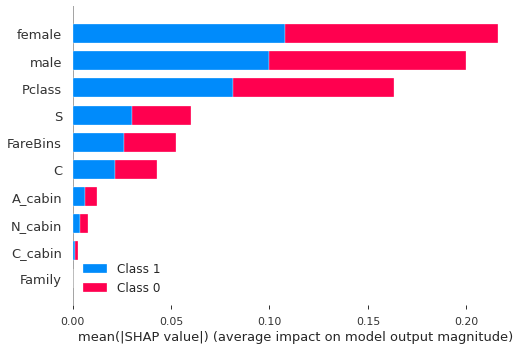

In [48]:
shap.summary_plot(shap_values, X_train2[features_final],plot_type="bar")

The above plot summarizes the average impact of the features on the model output magnitude. W e can see that female,male and Pclass has high average impact on the model.

### **8. Contribution Statement**
The author confirms sole responsibilty for the following: data pre-processing, exploratory data analysis,model building and interpretation of results.

### **9. Citations**
1. Data Munging by Prof. Nicholas Brown - https://colab.research.google.com/drive/1LYlc6NP-noZoTOGAAHf2muGbkuG2wN3c?usp=sharing
<br>
2. Exploratory Data Analysis by Prof. Nicholas Brown - https://colab.research.google.com/drive/1xFqXOc2eJT78HcVDmoD0twNETiTSvUwB?usp=sharing
3.  https://www.geeksforgeeks.org/how-to-create-dummy-variables-in-python-with-pandas/
4. https://github.com/KommuriRaju/RandomForest_with_RandomizedSearchCV/blob/main/Titanic_Data_Set_Used_RandomizedSearchCV/RandomForest_Used_RandomizedSearchCV_HyperparameterTuning.ipynb
5. https://colab.research.google.com/drive/1_bywxsJQhnapnG0A_jvhY1clDaBqxX1o#scrollTo=WCuN3IHSDJiZ
6. https://northeastern.instructure.com/courses/91290/pages/shap-values?module_item_id=6076407

### **10. Conclusion**

Two feature engineered and hyperparameter tuned machine learning models - Support Vector Classifier and Random Forest Classifier have been built to predict the survival of Titanic passengers with score of 0.77690 and 0.79926 . Shapely values have been used to interpret the model and has been observed that the Sex and Ticket Class(Pclass) of the passenger has high impact on their survival.

MIT License

Copyright 2021 Kashyap Datta Kovvali

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.